### SALES ANALYSIS

##### This analysis aims to extracting useful information as insight for decision making. The goals are to figure out transaction frequency, transaction volume, sales, and profit.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"G:\DATA ANALYTICS STUFF\Transaction Superstore.csv", encoding='windows-1254')

# DATA CLEANING 

Take a look at data informations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [4]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


#### Check if there is any duplicate in data

In [5]:
data.loc[data.duplicated()==True]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit


In [6]:
data.drop_duplicates()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,08-11-16,11-11-16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,12-06-16,16-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,11-10-15,18-10-15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21-01-14,23-01-14,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,26-02-17,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,26-02-17,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,26-02-17,03-03-17,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


No duplicate data found.

#### Check for null values

In [7]:
data.isnull().values.any()

False

No null values found.

#### Remove unwanted data, such as column Row ID.

In [8]:
del data['Row ID']

#### Adjust data format that is not apropriate, such as Order Date and Ship Date should be in datetime type, not object type.

In [9]:
data['Order Date'] = pd.to_datetime(data['Order Date'],format='%d-%m-%y')

In [10]:
data['Ship Date'] = pd.to_datetime(data['Ship Date'],format='%d-%m-%y')

In [11]:
data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# DATA ANALYSIS

## BY AREA

#### Region

In [12]:
transaction_by_region = data.groupby('Region').agg({'Region':'count',
                                                    'Quantity':'sum',
                                                    'Sales':'sum',
                                                    'Profit':'sum'})

In [13]:
transaction_by_region = transaction_by_region.rename(columns={'Region':'Frequency'})

In [14]:
transaction_by_region

,Frequency,Quantity,Sales,Profit
Region,,,,
Central,2323,8780,501239.8908,39706.3625
East,2848,10618,678781.2400,91522.7800
South,1620,6209,391721.9050,46749.4303
West,3203,12266,725457.8245,108418.4489


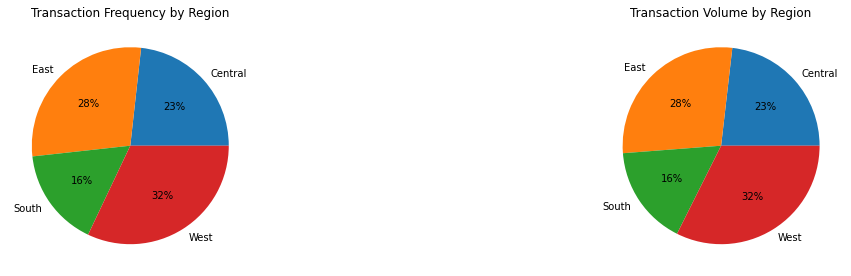

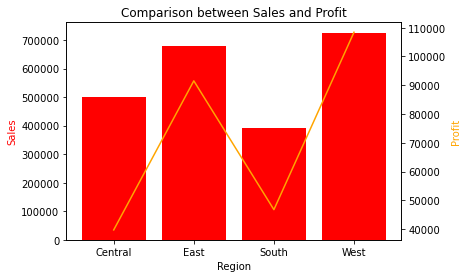

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pie(transaction_by_region['Frequency'], labels = transaction_by_region.index,autopct='%.0f%%')
plt.title('Transaction Frequency by Region')

plt.subplot(2,3,3)
plt.pie(transaction_by_region['Quantity'], labels = transaction_by_region.index,autopct='%.0f%%')
plt.title('Transaction Volume by Region')

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(transaction_by_region.index,transaction_by_region['Sales'], color='red')
ax2.plot(transaction_by_region.index,transaction_by_region['Profit'],color='orange')
ax1.set_xlabel('Region')
ax1.set_ylabel('Sales', color='red')
ax2.set_ylabel('Profit',color='orange')
plt.title('Comparison between Sales and Profit')
plt.show()

##### From that graph, I can conclude that the increasing sales is followed by increasing profit, however not for Central region. Although its sales is higher than South, but profit from Central is lower than South. It can be a serious problem that need to be solved.

#### State

In [16]:
transaction_by_state = data.groupby(['Region','State']).agg({'State':'count',
                                                    'Quantity':'sum',
                                                    'Sales':'sum',
                                                    'Profit':'sum'})

In [17]:
transaction_by_state = transaction_by_state.rename(columns={'State':'Frequency'})

In [18]:
transaction_by_state

Frequency  Quantity        Sales      Profit
Region  State                                                             
Central Illinois                    492      1845   80166.1010 -12607.8870
        Indiana                     149       578   53555.3600  18382.9363
        Iowa                         30       112    4579.7600   1183.8119
        Kansas                       24        74    2914.3100    836.4435
        Michigan                    255       946   76269.6140  24463.1876
        Minnesota                    89       331   29863.1500  10823.1874
        Missouri                     66       252   22205.1500   6436.2105
        Nebraska                     38       136    7464.9300   2037.0942
        North Dakota                  7        30     919.9100    230.1497
        Oklahoma                     66       247   19683.3900   4853.9560
        South Dakota                 12        42    1315.5600    394.8283
        Texas                       985      3724  170188.0458 -25729.3563
        Wisconsin                   110       463   32114.6100   8401.8004
East    Connecticut                  82       281   13384.3570   3511.4918
        Delaware                     96       367   27451.0690   9977.3748
        District of Columbia         10        40    2865.0200   1059.5893
        Maine                         8        35    1270.5300    454.4862
        Maryland                    105       420   23705.5230   7031.1788
        Massachusetts               135       491   28634.4340   6785.5016
        New Hampshire                27       127    7292.5240   1706.5028
        New Jersey                  130       454   35764.3120   9772.9138
        New York                   1128      4224  310876.2710  74038.5486
        Ohio                        469      1759   78258.1360 -16971.3766
        Pennsylvania                587      2153  116511.9140 -15559.9603
        Rhode Island                 56       199   22627.9560   7285.6293
        Vermont                      11        50    8929.3700   2244.9783
        West Virginia                 4        18    1209.8240    185.9216
South   Alabama                      61       256   19510.6400   5786.8253
        Arkansas                     60       240   11678.1300   4008.6871
        Florida                     383      1379   89473.7080  -3399.3017
        Georgia                     184       705   49095.8400  16250.0433
        Kentucky                    139       523   36591.7500  11199.6966
        Louisiana                    42       156    9217.0300   2196.1023
        Mississippi                  53       221   10771.3400   3172.9762
        North Carolina              249       983   55603.1640  -7490.9122
        South Carolina               42       172    8481.7100   1769.0566
        Tennessee                   183       681   30661.8730  -5341.6936
        Virginia                    224       893   70636.7200  18597.9504
West    Arizona                     224       862   35282.0010  -3427.9246
        California                 2001      7667  457687.6315  76381.3871
        Colorado                    182       693   32108.1180  -6527.8579
        Idaho                        21        64    4382.4860    826.7231
        Montana                      15        56    5589.3520   1833.3285
        Nevada                       39       168   16729.1020   3316.7659
        New Mexico                   37       151    4783.5220   1157.1161
        Oregon                      124       499   17431.1500  -1190.4705
        Utah                         53       219   11220.0560   2546.5335
        Washington                  506      1883  138641.2700  33402.6517
        Wyoming                       1         4    1603.1360    100.1960

In [19]:
top_5_profit_by_state = transaction_by_state.reset_index().sort_values(by='Profit',ascending=False).head(5)

In [20]:
top_5_profit_by_state

,Region,State,Frequency,Quantity,Sales,Profit
39,West,California,2001,7667,457687.6315,76381.3871
21,East,New York,1128,4224,310876.2710,74038.5486
47,West,Washington,506,1883,138641.2700,33402.6517
4,Central,Michigan,255,946,76269.6140,24463.1876
37,South,Virginia,224,893,70636.7200,18597.9504


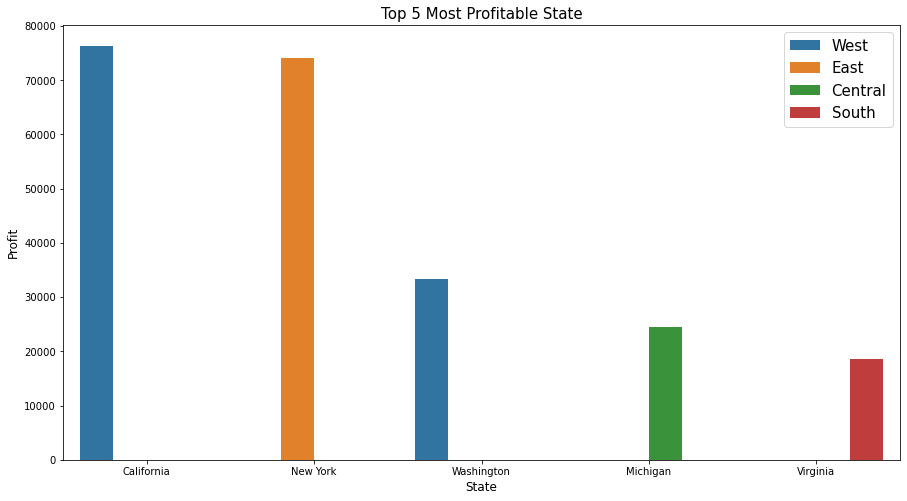

In [21]:
plt.figure(figsize=(15,8))
sns.barplot(data=top_5_profit_by_state, x='State', y='Profit',hue='Region')
plt.title('Top 5 Most Profitable State',fontsize=15)
plt.xlabel('State',fontsize=12)
plt.ylabel('Profit',fontsize=12)
plt.legend(fontsize=15)
plt.show()

In [22]:
bottom_5_profit_state = transaction_by_state.reset_index().sort_values(by='Profit',ascending=True).head(5)
bottom_5_profit_state

,Region,State,Frequency,Quantity,Sales,Profit
11,Central,Texas,985,3724,170188.0458,-25729.3563
22,East,Ohio,469,1759,78258.1360,-16971.3766
23,East,Pennsylvania,587,2153,116511.9140,-15559.9603
0,Central,Illinois,492,1845,80166.1010,-12607.8870
34,South,North Carolina,249,983,55603.1640,-7490.9122


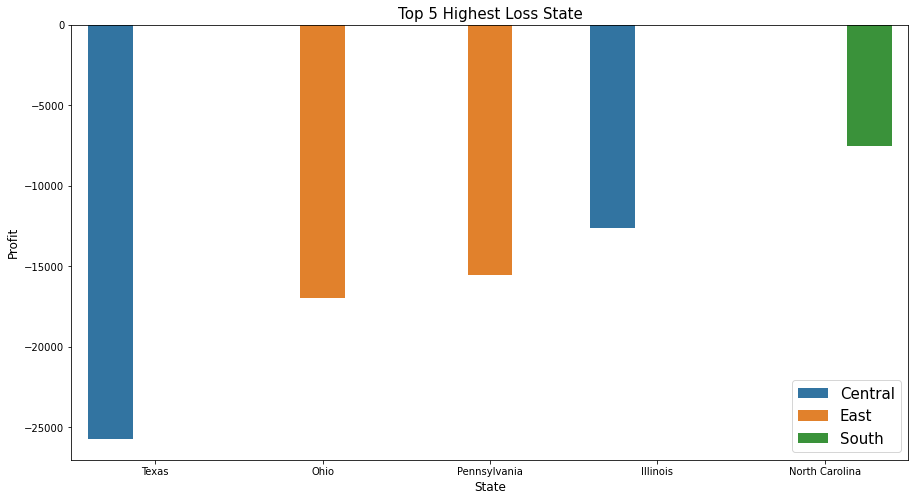

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(data=bottom_5_profit_state, x='State',y='Profit',hue='Region')
plt.title('Top 5 Highest Loss State',fontsize=15)
plt.ylabel('Profit',fontsize=12)
plt.xlabel('State',fontsize=12)
plt.legend(fontsize=15)
plt.show()

#### City 

In [24]:
transaction_by_city = data.groupby(['City']).agg({'City':'count',
                                                    'Quantity':'sum',
                                                    'Sales':'sum',
                                                    'Profit':'sum'})

In [25]:
transaction_by_city = transaction_by_city.rename(columns={'City':'Frequency'})

In [26]:
transaction_by_city

,Frequency,Quantity,Sales,Profit
City,,,,
Aberdeen,1,3,25.500,6.6300
Abilene,1,2,1.392,-3.7584
Akron,21,65,2729.986,-186.6356
Albuquerque,14,65,2220.160,634.0881
Alexandria,16,84,5519.570,318.6183
...,...,...,...,...
Woonsocket,4,15,195.550,78.6791
Yonkers,15,57,7657.666,2767.7557
York,5,19,817.978,-102.1692


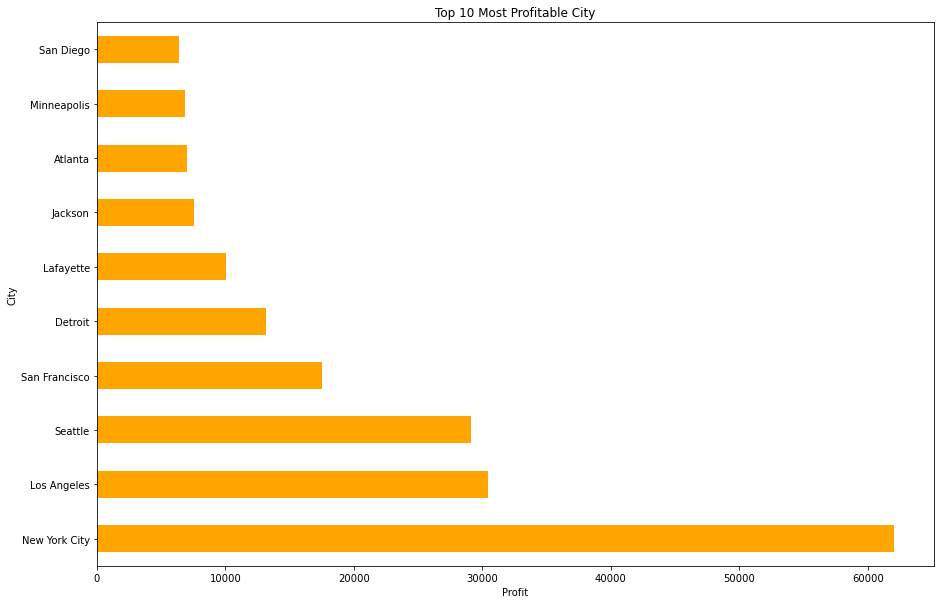

In [27]:
plt.figure(figsize=(15,10))
transaction_by_city['Profit'].sort_values(ascending=False).head(10).plot(kind='barh', color=['orange'])
plt.title('Top 10 Most Profitable City')
plt.xlabel('Profit')
plt.show()

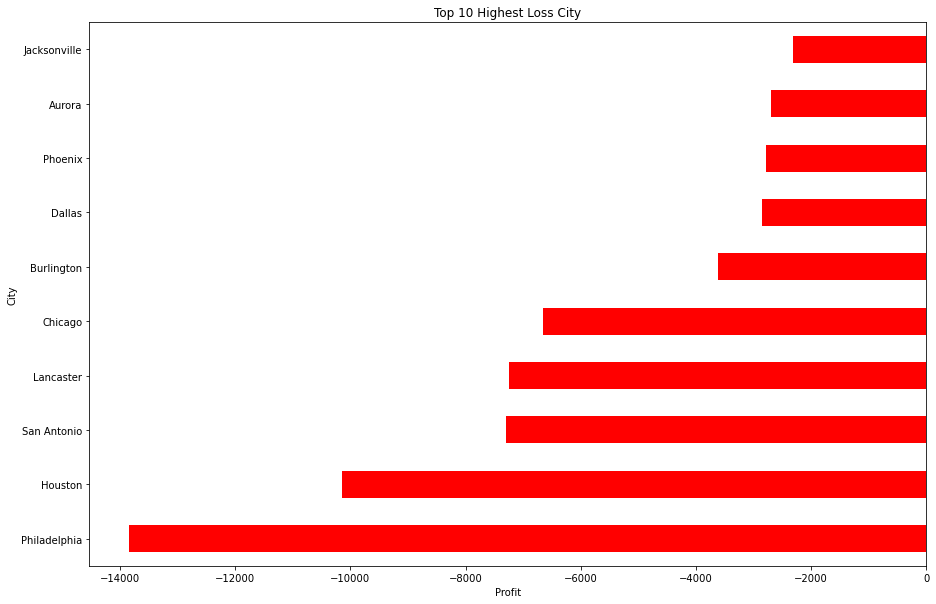

In [28]:
plt.figure(figsize=(15,10))
transaction_by_city['Profit'].sort_values(ascending=True).head(10).plot(kind='barh', color=['red'])
plt.title('Top 10 Highest Loss City')
plt.xlabel('Profit')
plt.show()

## BY TIME-SERIES

In [29]:
time_series = data[['Order ID','Order Date','Quantity','Sales','Profit']].copy()
time_series = time_series.groupby('Order Date').agg({'Order ID':'count',
                                                     'Quantity':'sum',
                                                     'Sales':'sum',
                                                     'Profit':'sum'}).rename(columns={'Order ID':'Frequency'}).reset_index()
time_series

,Order Date,Frequency,Quantity,Sales,Profit
0,2014-01-03,1,2,16.4480,5.5512
1,2014-01-04,3,8,288.0600,-65.9901
2,2014-01-05,1,3,19.5360,4.8840
3,2014-01-06,9,30,4407.1000,1358.0524
4,2014-01-07,2,10,87.1580,-71.9621
...,...,...,...,...,...
1232,2017-12-26,4,12,814.5940,61.1202
1233,2017-12-27,2,6,177.6360,-31.9742
1234,2017-12-28,19,64,1657.3508,253.1188
1235,2017-12-29,12,41,2915.5340,644.4338


In [30]:
time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  1237 non-null   datetime64[ns]
 1   Frequency   1237 non-null   int64         
 2   Quantity    1237 non-null   int64         
 3   Sales       1237 non-null   float64       
 4   Profit      1237 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 48.4 KB


In [31]:
time_series['Year'] = (time_series['Order Date'].dt.year).astype(str)
time_series['Month'] = (time_series['Order Date'].dt.month).astype(str)

In [32]:
import datetime as dt

In [33]:
time_series['Date'] = time_series['Order Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m'))

In [34]:
time_series

,Order Date,Frequency,Quantity,Sales,Profit,Year,Month,Date
0,2014-01-03,1,2,16.4480,5.5512,2014,1,2014-01
1,2014-01-04,3,8,288.0600,-65.9901,2014,1,2014-01
2,2014-01-05,1,3,19.5360,4.8840,2014,1,2014-01
3,2014-01-06,9,30,4407.1000,1358.0524,2014,1,2014-01
4,2014-01-07,2,10,87.1580,-71.9621,2014,1,2014-01
...,...,...,...,...,...,...,...,...
1232,2017-12-26,4,12,814.5940,61.1202,2017,12,2017-12
1233,2017-12-27,2,6,177.6360,-31.9742,2017,12,2017-12
1234,2017-12-28,19,64,1657.3508,253.1188,2017,12,2017-12
1235,2017-12-29,12,41,2915.5340,644.4338,2017,12,2017-12


In [35]:
annual_data = time_series.groupby('Year').agg({'Frequency':'sum',
                                               'Quantity':'sum',
                                               'Sales':'sum',
                                               'Profit':'sum'})
annual_data

,Frequency,Quantity,Sales,Profit
Year,,,,
2014,1993,7581,484247.4981,49543.9741
2015,2102,7979,470532.5090,61618.6037
2016,2587,9837,609205.5980,81795.1743
2017,3312,12476,733215.2552,93439.2696


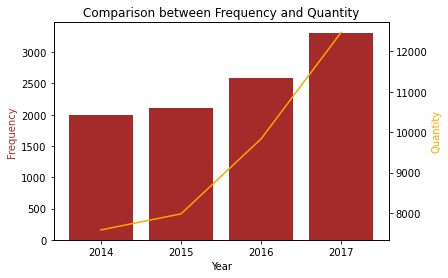

In [36]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(annual_data.index,annual_data['Frequency'], color='brown')
ax2.plot(annual_data.index,annual_data['Quantity'],color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Frequency', color='brown')
ax2.set_ylabel('Quantity',color='orange')
plt.title('Comparison between Frequency and Quantity')
plt.show()

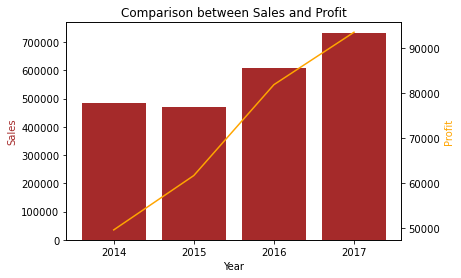

In [37]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(annual_data.index,annual_data['Sales'], color='brown')
ax2.plot(annual_data.index,annual_data['Profit'],color='orange')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color='brown')
ax2.set_ylabel('Profit',color='orange')
plt.title('Comparison between Sales and Profit')
plt.show()

In [38]:
annual_df = time_series.groupby('Date').agg({'Frequency':'sum',
                                             'Quantity':'sum',
                                             'Sales':'sum',
                                             'Profit':'sum'}).reset_index()
annual_df['Date'] = annual_df['Date'].apply(lambda x: dt.datetime.strptime(x,'%Y-%m').strftime('%Y-%m'))

In [39]:
annual_df = annual_df.set_index('Date')

In [40]:
annual_df

,Frequency,Quantity,Sales,Profit
Date,,,,
2014-01,79,284,14236.8950,2450.1907
2014-02,46,159,4519.8920,862.3084
2014-03,157,585,55691.0090,498.7299
2014-04,135,536,28295.3450,3488.8352
2014-05,122,466,23648.2870,2738.7096
2014-06,135,521,34595.1276,4976.5244
2014-07,143,550,33946.3930,-841.4826
2014-08,153,609,27909.4685,5318.1050
2014-09,268,1000,81777.3508,8328.0994


In [41]:
_2014 = time_series.loc[(time_series['Year'])=='2014'].copy()
_2015 = time_series.loc[(time_series['Year'])=='2015'].copy()
_2016 = time_series.loc[(time_series['Year'])=='2016'].copy()
_2017 = time_series.loc[(time_series['Year'])=='2017'].copy()

In [42]:
_2014['Month'] = _2014['Month'].astype(int)
_2015['Month'] = _2015['Month'].astype(int)
_2016['Month'] = _2016['Month'].astype(int)
_2017['Month'] = _2017['Month'].astype(int)

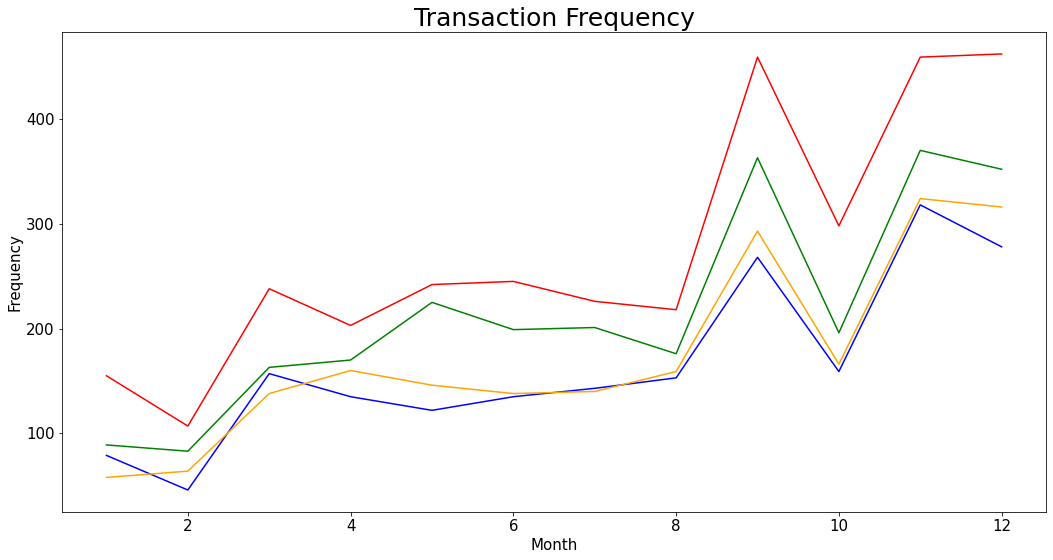

In [43]:
plt.figure(figsize=(60,30))
plt.subplot(3,3,1)
_2014.groupby('Month')['Frequency'].sum().plot(color='blue')

plt.subplot(3,3,1)
_2015.groupby('Month')['Frequency'].sum().plot(color='orange')

plt.subplot(3,3,1)
_2016.groupby('Month')['Frequency'].sum().plot(color='green')

plt.subplot(3,3,1)
_2017.groupby('Month')['Frequency'].sum().plot(color='red')
plt.title('Transaction Frequency',fontsize=25)
plt.ylabel('Frequency',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

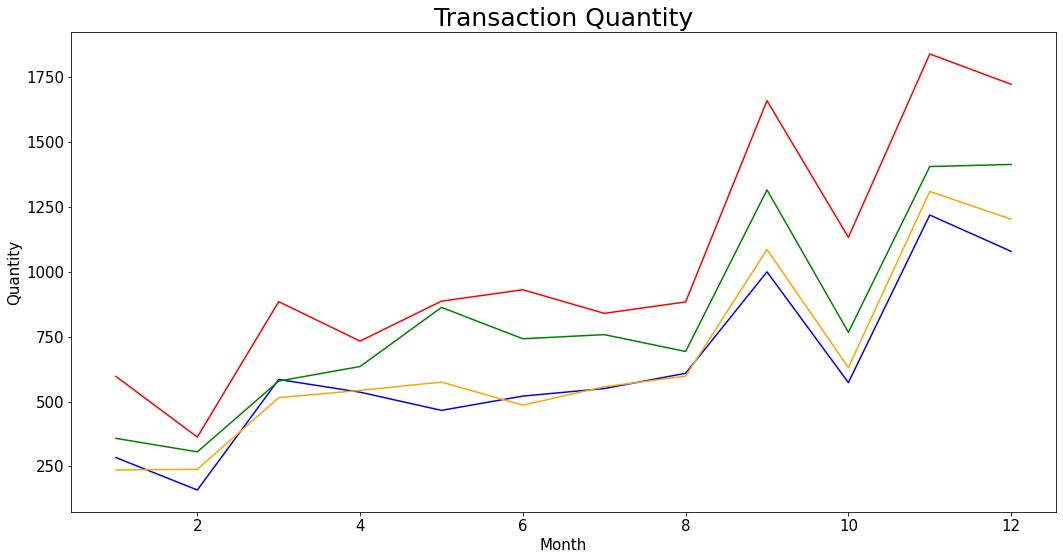

In [44]:
plt.figure(figsize=(60,30))
plt.subplot(3,3,1)
_2014.groupby('Month')['Quantity'].sum().plot(color='blue')

plt.subplot(3,3,1)
_2015.groupby('Month')['Quantity'].sum().plot(color='orange')

plt.subplot(3,3,1)
_2016.groupby('Month')['Quantity'].sum().plot(color='green')

plt.subplot(3,3,1)
_2017.groupby('Month')['Quantity'].sum().plot(color='red')
plt.title('Transaction Quantity',fontsize=25)
plt.ylabel('Quantity',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

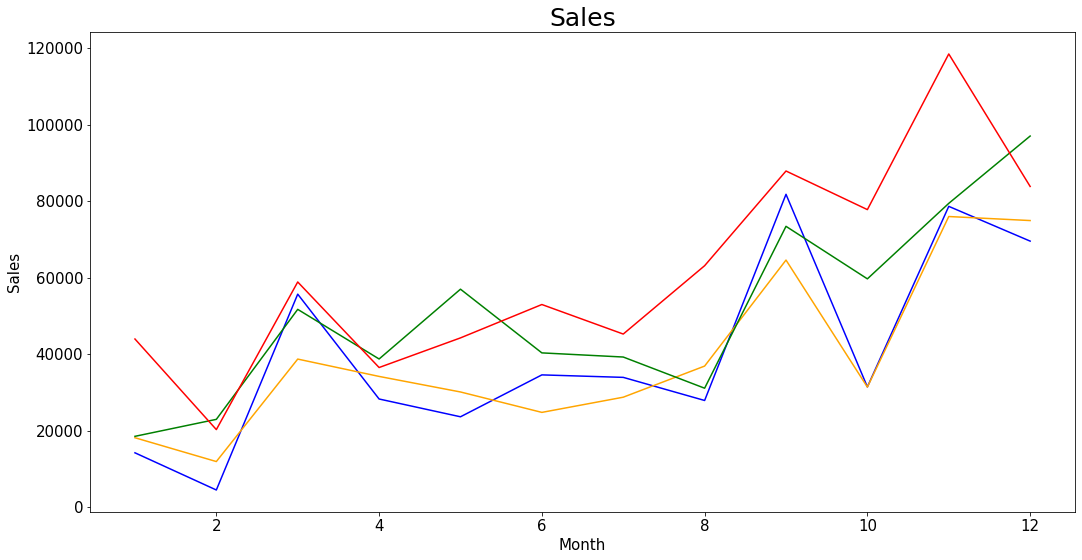

In [45]:
plt.figure(figsize=(60,30))
plt.subplot(3,3,1)
_2014.groupby('Month')['Sales'].sum().plot(color='blue')

plt.subplot(3,3,1)
_2015.groupby('Month')['Sales'].sum().plot(color='orange')

plt.subplot(3,3,1)
_2016.groupby('Month')['Sales'].sum().plot(color='green')

plt.subplot(3,3,1)
_2017.groupby('Month')['Sales'].sum().plot(color='red')
plt.title('Sales',fontsize=25)
plt.ylabel('Sales',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

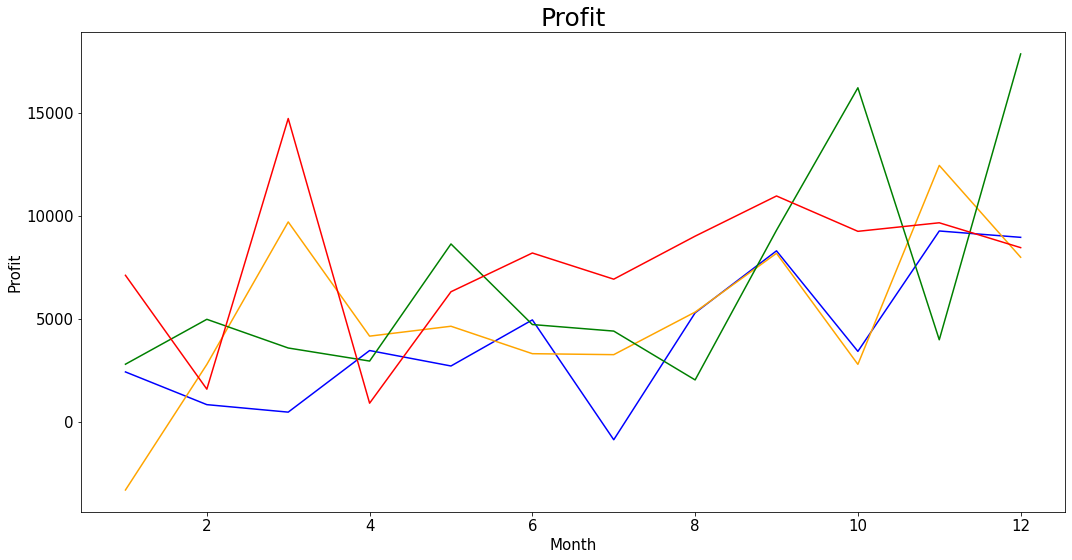

In [46]:
plt.figure(figsize=(60,30))
plt.subplot(3,3,1)
_2014.groupby('Month')['Profit'].sum().plot(color='blue')

plt.subplot(3,3,1)
_2015.groupby('Month')['Profit'].sum().plot(color='orange')

plt.subplot(3,3,1)
_2016.groupby('Month')['Profit'].sum().plot(color='green')

plt.subplot(3,3,1)
_2017.groupby('Month')['Profit'].sum().plot(color='red')
plt.title('Profit',fontsize=25)
plt.ylabel('Profit',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

After displaying profit columns per year, I discovered that there are several data yield negative profit(loss). I will look thoroughly at it and try to figure out the reason. 

In [47]:
loss_data = data.loc[(data['Profit'])<0].copy()

Discover the biggest loss in the data based on the time the order made and been delivered, also to where it been delivered.

In [48]:
loss_data['Profit'].describe()

count    1871.000000
mean      -83.448042
std       284.423422
min     -6599.978000
25%       -58.660950
50%       -18.088200
75%        -6.261500
max        -0.089500
Name: Profit, dtype: float64

In [49]:
loss_data = pd.DataFrame(loss_data.groupby(['Region','State','City','Order Date','Ship Date','Ship Mode','Category','Sub-Category','Product Name'])['Profit'].sum().sort_values(ascending=True)).reset_index()
loss_data

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit
0,East,Ohio,Lancaster,2016-11-25,2016-12-02,Standard Class,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,-6599.9780
1,South,North Carolina,Burlington,2017-11-04,2017-11-04,Same Day,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,-3839.9904
2,Central,Texas,San Antonio,2014-07-26,2014-07-30,Standard Class,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,-3701.8928
3,West,Colorado,Louisville,2017-04-17,2017-04-23,Standard Class,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800
4,Central,Illinois,Chicago,2017-12-07,2017-12-13,Standard Class,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,-2929.4845
...,...,...,...,...,...,...,...,...,...,...
1865,East,Pennsylvania,Philadelphia,2015-05-03,2015-05-07,Standard Class,Technology,Accessories,SanDisk Cruzer 16 GB USB Flash Drive,-0.3444
1866,West,Oregon,Tigard,2017-05-30,2017-06-03,Standard Class,Furniture,Furnishings,Tensor Brushed Steel Torchiere Floor Lamp,-0.3398
1867,Central,Texas,Allen,2015-11-29,2015-11-30,First Class,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,-0.2685
1868,Central,Texas,Coppell,2017-09-04,2017-09-08,Standard Class,Office Supplies,Storage,Acco Perma 3000 Stacking Storage Drawers,-0.2098


#### Find outliers 

In [50]:
Q1 = loss_data['Profit'].quantile(0.25)
Q3 = loss_data['Profit'].quantile(0.75)
IQR = Q3-Q1
Outliers = []
for i in loss_data['Profit']:
    if ((i < Q1-1.5*IQR) | (i > Q3+1.5*IQR)):
        Outliers.append('Outliers')
    else:
        Outliers.append('In-Control')

In [51]:
loss_data['Outliers'] = Outliers

In [52]:
loss_data

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit,Outliers
0,East,Ohio,Lancaster,2016-11-25,2016-12-02,Standard Class,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,-6599.9780,Outliers
1,South,North Carolina,Burlington,2017-11-04,2017-11-04,Same Day,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,Outliers
2,Central,Texas,San Antonio,2014-07-26,2014-07-30,Standard Class,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,-3701.8928,Outliers
3,West,Colorado,Louisville,2017-04-17,2017-04-23,Standard Class,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,Outliers
4,Central,Illinois,Chicago,2017-12-07,2017-12-13,Standard Class,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,-2929.4845,Outliers
...,...,...,...,...,...,...,...,...,...,...,...
1865,East,Pennsylvania,Philadelphia,2015-05-03,2015-05-07,Standard Class,Technology,Accessories,SanDisk Cruzer 16 GB USB Flash Drive,-0.3444,In-Control
1866,West,Oregon,Tigard,2017-05-30,2017-06-03,Standard Class,Furniture,Furnishings,Tensor Brushed Steel Torchiere Floor Lamp,-0.3398,In-Control
1867,Central,Texas,Allen,2015-11-29,2015-11-30,First Class,Technology,Accessories,Kingston Digital DataTraveler 16GB USB 2.0,-0.2685,In-Control
1868,Central,Texas,Coppell,2017-09-04,2017-09-08,Standard Class,Office Supplies,Storage,Acco Perma 3000 Stacking Storage Drawers,-0.2098,In-Control


In [53]:
worst_loss = loss_data.loc[(loss_data['Outliers'])=='Outliers'].copy()
worst_loss

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit,Outliers
0,East,Ohio,Lancaster,2016-11-25,2016-12-02,Standard Class,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,-6599.9780,Outliers
1,South,North Carolina,Burlington,2017-11-04,2017-11-04,Same Day,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,Outliers
2,Central,Texas,San Antonio,2014-07-26,2014-07-30,Standard Class,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,-3701.8928,Outliers
3,West,Colorado,Louisville,2017-04-17,2017-04-23,Standard Class,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,Outliers
4,Central,Illinois,Chicago,2017-12-07,2017-12-13,Standard Class,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,-2929.4845,Outliers
...,...,...,...,...,...,...,...,...,...,...,...
230,Central,Texas,Dallas,2014-07-20,2014-07-24,Standard Class,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,-140.1960,Outliers
231,East,Pennsylvania,Philadelphia,2017-11-07,2017-11-13,Standard Class,Furniture,Tables,Bevis Rectangular Conference Tables,-140.1408,Outliers
232,East,Pennsylvania,Philadelphia,2016-03-13,2016-03-15,Second Class,Office Supplies,Storage,"SAFCO Commercial Wire Shelving, Black",-138.1400,Outliers
233,Central,Texas,Houston,2016-12-02,2016-12-04,Second Class,Furniture,Bookcases,Sauder Camden County Collection Library,-137.9760,Outliers


I want to discover the factors of why it could happen by breaking down each feature.

Firstly, I want to concord the shipping mode that customers choose with the order date and ship date. For instance, customers who choose to use Same Day service want their orders delivered at that day, therefore the order date and ship date must be same. And so do the other ship modes.

In [54]:
loss_class_by_ship = worst_loss.groupby('Ship Mode').agg({'Ship Mode':'count',
                                                          'Profit':'sum'}).rename(columns={'Ship Mode':'Frequency'}).reset_index()
loss_class_by_ship['Average Loss'] = loss_class_by_ship['Profit'] / loss_class_by_ship['Frequency']
loss_class_by_ship.sort_values(by='Average Loss')

,Ship Mode,Frequency,Profit,Average Loss
3,Standard Class,143,-72531.3946,-507.212550
1,Same Day,14,-7021.1406,-501.510043
0,First Class,34,-16091.0251,-473.265444
2,Second Class,44,-16955.1265,-385.343784


In [55]:
by_ship_mode = worst_loss.groupby('Ship Mode')
by_ship_mode

In [56]:
same_day = by_ship_mode.get_group('Same Day')
same_day

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit,Outliers
1,South,North Carolina,Burlington,2017-11-04,2017-11-04,Same Day,Technology,Machines,Cubify CubeX 3D Printer Triple Head Print,-3839.9904,Outliers
85,Central,Texas,Amarillo,2015-10-15,2015-10-15,Same Day,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,-350.4900,Outliers
94,Central,Texas,San Antonio,2014-12-12,2014-12-12,Same Day,Office Supplies,Binders,GBC DocuBind 300 Electric Binding Machine,-336.6272,Outliers
100,East,Pennsylvania,Philadelphia,2016-07-10,2016-07-10,Same Day,Technology,Machines,"Brother MFC-9340CDW LED All-In-One Printer, Co...",-319.1916,Outliers
110,East,New York,New York City,2017-06-30,2017-06-30,Same Day,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,-295.9785,Outliers
111,Central,Illinois,Skokie,2017-12-14,2017-12-14,Same Day,Furniture,Furnishings,"Rubbermaid ClusterMat Chairmats, Mat Size- 66""...",-292.9872,Outliers
113,East,New York,New York City,2015-07-31,2015-07-31,Same Day,Furniture,Tables,"Bevis Round Bullnose 29"" High Table Top",-290.8752,Outliers
143,West,California,San Francisco,2015-07-16,2015-07-16,Same Day,Furniture,Chairs,Hon 2090 “Pillow Soft” Series Mid Back Swivel/...,-219.1644,Outliers
149,East,Ohio,Columbus,2014-11-24,2014-11-24,Same Day,Technology,Phones,Samsung Galaxy S III - 16GB - pebble blue (T-M...,-209.9940,Outliers
157,South,North Carolina,Burlington,2016-11-15,2016-11-15,Same Day,Furniture,Tables,Hon Racetrack Conference Tables,-199.5076,Outliers


In [57]:
standard_class = by_ship_mode.get_group('Standard Class').copy()
standard_class['Timedelta'] = (standard_class['Ship Date'] - standard_class['Order Date']).astype(str).str.replace('days','').astype(int)
standard_class

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit,Outliers,Timedelta
0,East,Ohio,Lancaster,2016-11-25,2016-12-02,Standard Class,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,-6599.9780,Outliers,7
2,Central,Texas,San Antonio,2014-07-26,2014-07-30,Standard Class,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,-3701.8928,Outliers,4
3,West,Colorado,Louisville,2017-04-17,2017-04-23,Standard Class,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,-3399.9800,Outliers,6
4,Central,Illinois,Chicago,2017-12-07,2017-12-13,Standard Class,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,-2929.4845,Outliers,6
8,Central,Texas,Houston,2016-04-08,2016-04-12,Standard Class,Office Supplies,Binders,GBC DocuBind P400 Electric Binding System,-1850.9464,Outliers,4
...,...,...,...,...,...,...,...,...,...,...,...,...
226,West,Colorado,Colorado Springs,2015-12-11,2015-12-16,Standard Class,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Dark Cher...",-143.7904,Outliers,5
227,Central,Texas,Bryan,2016-03-15,2016-03-19,Standard Class,Furniture,Chairs,Novimex Swivel Fabric Task Chair,-143.4310,Outliers,4
228,East,Ohio,Springfield,2014-03-28,2014-04-03,Standard Class,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-143.2548,Outliers,6
230,Central,Texas,Dallas,2014-07-20,2014-07-24,Standard Class,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,-140.1960,Outliers,4


In [58]:
standard_class['Timedelta'].describe()

count    143.000000
mean       4.986014
std        1.027687
min        4.000000
25%        4.000000
50%        5.000000
75%        6.000000
max        7.000000
Name: Timedelta, dtype: float64

In [59]:
first_class = by_ship_mode.get_group('First Class').copy()
first_class['Timedelta'] = (first_class['Ship Date'] - first_class['Order Date']).astype(str).str.replace('days','').astype(int)
first_class

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit,Outliers,Timedelta
5,East,Ohio,Newark,2015-12-15,2015-12-18,First Class,Technology,Machines,Cubify CubeX 3D Printer Double Head Print,-2639.9912,Outliers,3
6,Central,Texas,Houston,2017-11-19,2017-11-21,First Class,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,-2287.7820,Outliers,2
21,South,Tennessee,Knoxville,2017-10-02,2017-10-05,First Class,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-1002.7836,Outliers,3
25,West,Colorado,Pueblo,2016-10-06,2016-10-07,First Class,Technology,Machines,Zebra GK420t Direct Thermal/Thermal Transfer P...,-938.2800,Outliers,1
26,East,Ohio,Springfield,2017-11-13,2017-11-15,First Class,Technology,Machines,Epson TM-T88V Direct Thermal Printer - Monochr...,-935.9595,Outliers,2
27,East,Pennsylvania,Bethlehem,2016-07-28,2016-07-29,First Class,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,-913.1760,Outliers,1
33,East,Pennsylvania,Philadelphia,2016-09-03,2016-09-05,First Class,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,-760.9800,Outliers,2
35,Central,Illinois,Rockford,2016-09-24,2016-09-26,First Class,Office Supplies,Binders,GBC ProClick 150 Presentation Binding System,-729.9138,Outliers,2
47,Central,Illinois,Aurora,2015-06-22,2015-06-25,First Class,Furniture,Tables,Hon Rectangular Conference Tables,-525.6405,Outliers,3
68,East,Pennsylvania,Philadelphia,2017-09-16,2017-09-18,First Class,Office Supplies,Binders,GBC DocuBind TL300 Electric Binding System,-412.6154,Outliers,2


In [60]:
second_class = by_ship_mode.get_group('Second Class').copy()
second_class['Timedelta'] = (second_class['Ship Date'] - second_class['Order Date']).astype(str).str.replace('days','').astype(int)
second_class

,Region,State,City,Order Date,Ship Date,Ship Mode,Category,Sub-Category,Product Name,Profit,Outliers,Timedelta
7,South,North Carolina,Concord,2015-01-28,2015-01-31,Second Class,Furniture,Tables,Chromcraft Bull-Nose Wood Oval Conference Tabl...,-1862.3124,Outliers,3
18,South,Tennessee,Clarksville,2015-12-04,2015-12-07,Second Class,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,-1065.3720,Outliers,3
19,East,Pennsylvania,Philadelphia,2017-09-22,2017-09-26,Second Class,Office Supplies,Supplies,Martin Yale Chadless Opener Electric Letter Op...,-1049.3406,Outliers,4
32,Central,Texas,Houston,2017-12-02,2017-12-04,Second Class,Office Supplies,Appliances,3.6 Cubic Foot Counter Height Office Refrigerator,-766.0120,Outliers,2
34,East,Ohio,Lorain,2014-10-31,2014-11-02,Second Class,Furniture,Tables,Hon 94000 Series Round Tables,-734.5264,Outliers,2
38,East,Pennsylvania,Philadelphia,2016-03-13,2016-03-15,Second Class,Technology,Machines,Okidata MB491 Multifunction Printer,-643.7100,Outliers,2
39,East,Pennsylvania,Philadelphia,2017-08-17,2017-08-22,Second Class,Furniture,Chairs,HON 5400 Series Task Chairs for Big and Tall,-630.8820,Outliers,5
42,Central,Illinois,Chicago,2017-09-08,2017-09-13,Second Class,Furniture,Tables,BoxOffice By Design Rectangular and Half-Moon ...,-566.5625,Outliers,5
49,Central,Texas,Houston,2014-09-19,2014-09-21,Second Class,Technology,Machines,Lexmark MX611dhe Monochrome Laser Printer,-509.9970,Outliers,2
52,Central,Illinois,Chicago,2015-03-05,2015-03-09,Second Class,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,-470.5480,Outliers,4


After I check, there is no tardiness and no violation between Ship Mode and how long each transactions been processed.

In [61]:
by_area = worst_loss.groupby('Region').agg({'Region':'count',
                                            'Profit':'sum'}).rename(columns={'Region':'Frequency'}).reset_index()
by_area

,Region,Frequency,Profit
0,Central,82,-38596.8426
1,East,76,-35085.7143
2,South,36,-22951.7527
3,West,41,-15964.3772


<Figure size 1080x720 with 0 Axes>

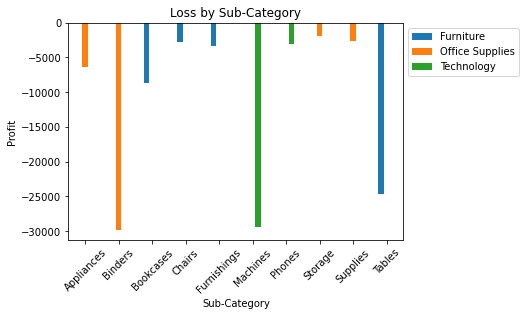

In [62]:
plt.figure(figsize=(15,10))
worst_loss.groupby(['Sub-Category','Category'])['Profit'].sum().unstack().sort_values(by='Sub-Category',ascending=True).plot(kind='bar')
plt.title('Loss by Sub-Category')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.xticks(rotation=45)
plt.ylabel('Profit')
plt.show()

Next, we want to compare whether the loss is terrible in comparison with profit gaining. 

In [63]:
profit_only_product_data = data.loc[(data['Profit'])>0].copy()

In [64]:
profit_only_product_data = pd.DataFrame(profit_only_product_data.groupby(['Category','Sub-Category','Product Name','Order Date'])['Profit'].sum().sort_values(ascending=True)).reset_index()
profit_only_product_data

,Category,Sub-Category,Product Name,Order Date,Profit
0,Office Supplies,Supplies,Serrated Blade or Curved Handle Hand Letter Op...,2014-10-28,0.0628
1,Office Supplies,Supplies,Acme Serrated Blade Letter Opener,2015-12-29,0.0636
2,Office Supplies,Fasteners,"Brites Rubber Bands, 1 1/2 oz. Box",2016-07-03,0.0792
3,Office Supplies,Fasteners,Bagged Rubber Bands,2017-01-14,0.1008
4,Office Supplies,Fasteners,Revere Boxed Rubber Bands by Revere,2014-09-19,0.1134
...,...,...,...,...,...
8024,Office Supplies,Binders,Ibico EPK-21 Electric Binding System,2014-09-23,4630.4755
8025,Office Supplies,Binders,GBC Ibimaster 500 Manual ProClick Binding System,2016-12-17,4946.3700
8026,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,2017-11-17,5039.9856
8027,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,2017-03-23,6719.9808


In [65]:
profit_only_product = pd.DataFrame(profit_only_product_data.groupby(['Category','Sub-Category'])['Profit'].sum())
profit_only_product

Profit
Category        Sub-Category            
Furniture       Bookcases      8679.6500
                Chairs        36471.0076
                Furnishings   19550.0570
                Tables        14686.6672
Office Supplies Appliances    26767.6466
                Art            6527.7870
                Binders       68732.2597
                Envelopes      6964.1767
                Fasteners       982.7134
                Labels         5546.2540
                Paper         34053.5693
                Storage       27705.1302
                Supplies       1826.5224
Technology      Accessories   42867.2622
                Copiers       55617.8249
                Machines      33503.4251
                Phones        52046.3541

In [66]:
loss_only_product = pd.DataFrame(loss_data.groupby(['Category','Sub-Category'])['Profit'].sum()).rename(columns={'Profit':'Loss'})
loss_only_product

Loss
Category        Sub-Category            
Furniture       Bookcases    -12152.2060
                Chairs        -9880.8413
                Furnishings   -6490.9134
                Tables       -32412.1483
Office Supplies Appliances    -8629.6412
                Binders      -38510.4964
                Fasteners       -33.1952
                Storage       -6426.3038
                Supplies      -3015.6219
Technology      Accessories    -930.6265
                Machines     -30118.6682
                Phones        -7530.6235

In [67]:
loss_x_profit = pd.merge(profit_only_product,loss_only_product,how='inner',left_index=True,right_index=True)
loss_x_profit['Margin'] = loss_x_profit['Profit'] + loss_x_profit['Loss']
loss_x_profit

Profit        Loss      Margin
Category        Sub-Category                                    
Furniture       Bookcases      8679.6500 -12152.2060  -3472.5560
                Chairs        36471.0076  -9880.8413  26590.1663
                Furnishings   19550.0570  -6490.9134  13059.1436
                Tables        14686.6672 -32412.1483 -17725.4811
Office Supplies Appliances    26767.6466  -8629.6412  18138.0054
                Binders       68732.2597 -38510.4964  30221.7633
                Fasteners       982.7134    -33.1952    949.5182
                Storage       27705.1302  -6426.3038  21278.8264
                Supplies       1826.5224  -3015.6219  -1189.0995
Technology      Accessories   42867.2622   -930.6265  41936.6357
                Machines      33503.4251 -30118.6682   3384.7569
                Phones        52046.3541  -7530.6235  44515.7306

In [68]:
transaction_data = data.groupby(['Region','Segment','Category']).agg({'Order ID':'count',
                                                           'Quantity':'sum',
                                                           'Sales':'sum',
                                                           'Profit':'sum'})
transaction_data

Order ID  Quantity        Sales  \
Region  Segment     Category                                           
Central Consumer    Furniture             255       952   86229.2190   
                    Office Supplies       739      2777   93111.4790   
                    Technology            218       790   72690.7360   
        Corporate   Furniture             137       542   52085.6018   
                    Office Supplies       417      1605   41137.7010   
                    Technology            119       457   64772.5100   
        Home Office Furniture              89       333   25482.3430   
                    Office Supplies       266      1027   32777.2350   
                    Technology             83       297   32953.0660   
East    Consumer    Furniture             303      1114  114211.8020   
                    Office Supplies       888      3245  101255.1360   
                    Technology            278       988  135441.2290   
        Corporate   Furniture             198       723   64209.0460   
                    Office Supplies       520      2035   66474.7350   
                    Technology            159       600   69725.5660   
        Home Office Furniture             100       377   29870.3560   
                    Office Supplies       304      1182   37786.1840   
                    Technology             98       354   59807.1860   
South   Consumer    Furniture             180       695   70800.2040   
                    Office Supplies       505      1899   59504.5810   
                    Technology            153       584   65276.1860   
        Corporate   Furniture             101       415   29645.0315   
                    Office Supplies       324      1281   45930.1700   
                    Technology             85       320   46310.7310   
        Home Office Furniture              51       181   16853.4485   
                    Office Supplies       166       620   20216.5620   
                    Technology             55       214   37184.9910   
West    Consumer    Furniture             375      1405  119808.0870   
                    Office Supplies       995      3837  110080.9400   
                    Technology            302      1235  132991.7460   
        Corporate   Furniture             210       815   83080.1065   
                    Office Supplies       559      2097   77133.8560   
                    Technology            191       718   65641.3120   
        Home Office Furniture             122       476   49724.5500   
                    Office Supplies       343      1301   33638.4530   
                    Technology            106       382   53358.7740   

                                         Profit  
Region  Segment     Category                     
Central Consumer    Furniture        -3994.4342  
                    Office Supplies   2583.1432  
                    Technology        9975.3391  
        Corporate   Furniture         2321.9939  
                    Office Supplies     99.2948  
                    Technology       16282.6133  
        Home Office Furniture        -1198.6091  
                    Office Supplies   6197.5419  
                    Technology        7439.4796  
East    Consumer    Furniture         2038.1122  
                    Office Supplies  19222.6927  
                    Technology       19930.1794  
        Corporate   Furniture          342.1257  
                    Office Supplies  13457.6650  
                    Technology        9822.7882  
        Home Office Furniture          665.9279  
                    Office Supplies   8334.2214  
                    Technology       17709.0675  
South   Consumer    Furniture         4616.7326  
                    Office Supplies   9190.1172  
                    Technology       13106.7230  
        Corporate   Furniture          952.0303  
                    Office Supplies   8142.6596  
                    Technology        6120.5333  


In [69]:
trans_df = pd.DataFrame(transaction_data).reset_index()

In [70]:
trans = pd.DataFrame(trans_df.groupby(['Region','Segment','Category'])['Order ID'].sum()).reset_index()
trans

,Region,Segment,Category,Order ID
0,Central,Consumer,Furniture,255
1,Central,Consumer,Office Supplies,739
2,Central,Consumer,Technology,218
3,Central,Corporate,Furniture,137
4,Central,Corporate,Office Supplies,417
5,Central,Corporate,Technology,119
6,Central,Home Office,Furniture,89
7,Central,Home Office,Office Supplies,266
8,Central,Home Office,Technology,83
9,East,Consumer,Furniture,303


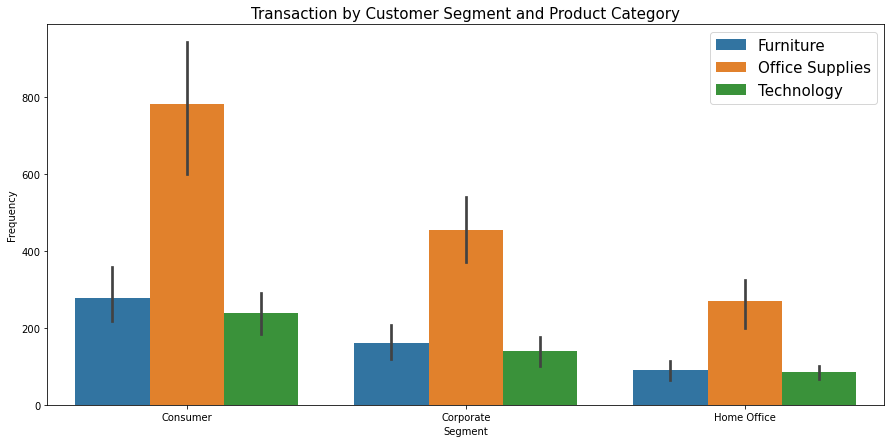

In [71]:
plt.figure(figsize=(15,7))
sns.barplot(x='Segment', y='Order ID', data=trans, hue='Category')
plt.title('Transaction by Customer Segment and Product Category',fontsize=15)
plt.ylabel('Frequency')
plt.legend(fontsize=15)
plt.xticks(rotation=0)
plt.show()

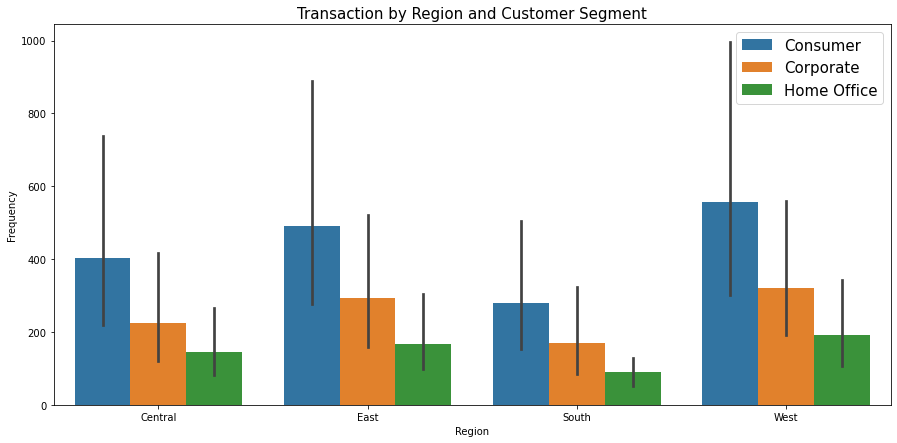

In [72]:
plt.figure(figsize=(15,7))
sns.barplot(x='Region', y='Order ID', data=trans, hue='Segment')
plt.title('Transaction by Region and Customer Segment',fontsize=15)
plt.ylabel('Frequency')
plt.legend(fontsize=15)
plt.xticks(rotation=0)
plt.show()

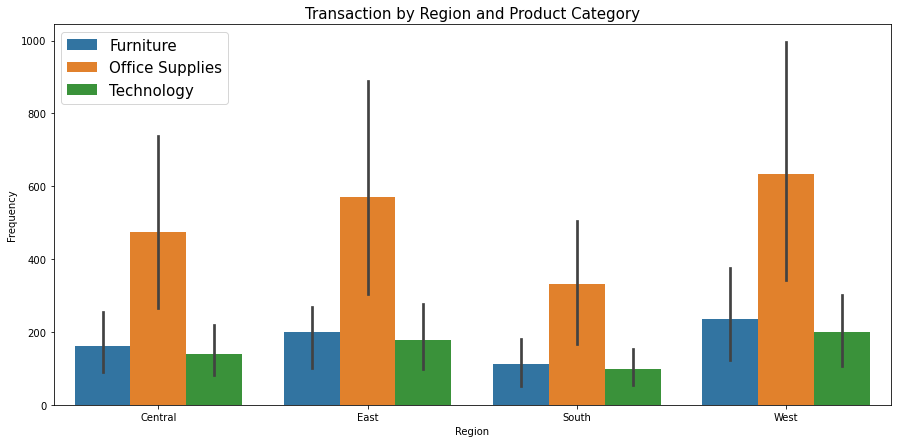

In [73]:
plt.figure(figsize=(15,7))
sns.barplot(x='Region', y='Order ID', data=trans, hue='Category')
plt.title('Transaction by Region and Product Category',fontsize=15)
plt.ylabel('Frequency')
plt.legend(fontsize=15)
plt.xticks(rotation=0)
plt.show()

From the dataframe above, we discover store's condition by looking at the variable.

1. Loss condition only happen in Furniture category in Central region from transaction made by Consumer and Home Office segment.

2. Although Furniture category is on the second place in every variable but it obtains the worst profit than other category.

We try to reveal the reasons why there are several transactions yield negative profit(loss). We presume that the loss caused by several feature in the data, for instance Ship Date, Ship Mode, Segment, Region, State, and Product Category.

In [74]:
loss_df = data[['Order ID','Ship Date','Segment','Region','State','Category','Sub-Category','Product Name','Profit']].copy()
loss_df = loss_df.loc[loss_df['Profit']<0].copy()
loss_df

,Order ID,Ship Date,Segment,Region,State,Category,Sub-Category,Product Name,Profit
3,US-2015-108966,2015-10-18,Consumer,South,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,-383.0310
14,US-2015-118983,2015-11-26,Home Office,Central,Texas,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,-123.8580
15,US-2015-118983,2015-11-26,Home Office,Central,Texas,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,-3.8160
23,US-2017-156909,2017-07-18,Consumer,East,Pennsylvania,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",-1.0196
27,US-2015-150630,2015-09-21,Consumer,East,Pennsylvania,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",-1665.0522
...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,2016-03-19,Corporate,Central,Texas,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",-35.8176
9921,CA-2014-111360,2014-11-30,Home Office,East,Ohio,Office Supplies,Binders,Acco Expandable Hanging Binders,-4.5936
9931,CA-2015-104948,2015-11-17,Consumer,West,California,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,-40.1960
9937,CA-2016-164889,2016-06-06,Corporate,West,California,Furniture,Tables,Hon 61000 Series Interactive Training Tables,-1.7772


In [75]:
loss_df['Date'] = loss_df['Ship Date'].apply(lambda x: dt.datetime.strftime(x,'%Y-%m'))

In [76]:
loss_df

,Order ID,Ship Date,Segment,Region,State,Category,Sub-Category,Product Name,Profit,Date
3,US-2015-108966,2015-10-18,Consumer,South,Florida,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,-383.0310,2015-10
14,US-2015-118983,2015-11-26,Home Office,Central,Texas,Office Supplies,Appliances,Holmes Replacement Filter for HEPA Air Cleaner...,-123.8580,2015-11
15,US-2015-118983,2015-11-26,Home Office,Central,Texas,Office Supplies,Binders,Storex DuraTech Recycled Plastic Frosted Binders,-3.8160,2015-11
23,US-2017-156909,2017-07-18,Consumer,East,Pennsylvania,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",-1.0196,2017-07
27,US-2015-150630,2015-09-21,Consumer,East,Pennsylvania,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",-1665.0522,2015-09
...,...,...,...,...,...,...,...,...,...,...
9920,CA-2016-149272,2016-03-19,Corporate,Central,Texas,Office Supplies,Binders,"GBC Pre-Punched Binding Paper, Plastic, White,...",-35.8176,2016-03
9921,CA-2014-111360,2014-11-30,Home Office,East,Ohio,Office Supplies,Binders,Acco Expandable Hanging Binders,-4.5936,2014-11
9931,CA-2015-104948,2015-11-17,Consumer,West,California,Furniture,Bookcases,O'Sullivan Living Dimensions 3-Shelf Bookcases,-40.1960,2015-11
9937,CA-2016-164889,2016-06-06,Corporate,West,California,Furniture,Tables,Hon 61000 Series Interactive Training Tables,-1.7772,2016-06


In [77]:
loss_by_date = pd.DataFrame(loss_df.groupby('Date')['Profit'].sum()).reset_index()
loss_by_date

,Date,Profit
0,2014-01,-638.5403
1,2014-02,-118.0245
2,2014-03,-4105.6259
3,2014-04,-1215.9850
4,2014-05,-1611.5655
5,2014-06,-1456.3512
6,2014-07,-4520.8706
7,2014-08,-787.6018
8,2014-09,-7140.4829
9,2014-10,-1185.5632


In [78]:
avg = loss_by_date['Profit'].mean()
Limit = []
for i in loss_by_date['Profit']:
    if i < avg :
        Limit.append('Out-of-control')
    else:
        Limit.append('In-Control')

In [79]:
loss_by_date['Limit'] = Limit

In [80]:
loss_by_date.describe()

,Profit
count,49.000000
mean,-3186.352769
std,2611.561766
min,-10998.514400
25%,-4202.775600
50%,-2254.842000
75%,-1456.351200
max,-118.024500


In [81]:
loss_by_date

,Date,Profit,Limit
0,2014-01,-638.5403,In-Control
1,2014-02,-118.0245,In-Control
2,2014-03,-4105.6259,Out-of-control
3,2014-04,-1215.9850,In-Control
4,2014-05,-1611.5655,In-Control
5,2014-06,-1456.3512,In-Control
6,2014-07,-4520.8706,Out-of-control
7,2014-08,-787.6018,In-Control
8,2014-09,-7140.4829,Out-of-control
9,2014-10,-1185.5632,In-Control


In [82]:
frq_limit = (loss_by_date['Limit'].value_counts()).reset_index()
frq_limit

,index,Limit
0,In-Control,32
1,Out-of-control,17


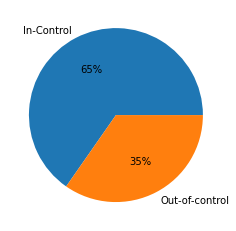

In [83]:
plt.pie(frq_limit['Limit'],labels = frq_limit['index'],autopct='%.0f%%')
plt.show()

There are 35 percent of loss transactions below average loss.

In [84]:
df = data[['Ship Date','Profit']].copy()
df['Monthly'] = data['Ship Date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m'))
df = pd.DataFrame(df.groupby('Monthly')['Profit'].sum())
df

,Profit
Monthly,
2014-01,2424.1125
2014-02,866.1925
2014-03,123.4122
2014-04,3313.2568
2014-05,2636.2171
2014-06,5316.8660
2014-07,-1047.8993
2014-08,6161.5346
2014-09,6835.8856


From that data, I will fetch data with negative profit only.

In [85]:
negative_profit = df.loc[(df['Profit'])<0].copy()
negative_profit = negative_profit.reset_index()
negative_profit

,Monthly,Profit
0,2014-07,-1047.8993
1,2015-01,-1455.5695


I will cross-check with the main data to get entire information why on that date the transactions have negative profit.

In [86]:
data['Monthly'] = data['Ship Date'].apply(lambda x: dt.datetime.strftime(x,'%Y-%m'))

In [87]:
negative_profit_data = pd.merge(negative_profit, data, on='Monthly', how='inner')
negative_profit_data

,Monthly,Profit_x,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit_y
0,2014-07,-1047.8993,CA-2014-129924,2014-07-12,2014-07-17,Standard Class,AC-10420,Alyssa Crouse,Corporate,United States,...,94122,West,OFF-BI-10003314,Office Supplies,Binders,Tuff Stuff Recycled Round Ring Binders,7.712,2,0.2,2.7956
1,2014-07,-1047.8993,CA-2014-129924,2014-07-12,2014-07-17,Standard Class,AC-10420,Alyssa Crouse,Corporate,United States,...,94122,West,FUR-TA-10004575,Furniture,Tables,Hon 5100 Series Wood Tables,698.352,3,0.2,-17.4588
2,2014-07,-1047.8993,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,...,85705,West,OFF-BI-10001982,Office Supplies,Binders,Wilson Jones Custom Binder Spines & Labels,8.160,5,0.7,-5.7120
3,2014-07,-1047.8993,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,...,85705,West,TEC-AC-10003911,Technology,Accessories,NETGEAR AC1750 Dual Band Gigabit Smart WiFi Ro...,1023.936,8,0.2,179.1888
4,2014-07,-1047.8993,US-2014-119137,2014-07-23,2014-07-27,Standard Class,AG-10900,Arthur Gainer,Consumer,United States,...,85705,West,OFF-AR-10000658,Office Supplies,Art,Newell 324,9.240,1,0.2,0.9240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2015-01,-1455.5695,CA-2015-128608,2015-01-12,2015-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376,4,0.4,2.6376
251,2015-01,-1455.5695,CA-2015-128608,2015-01-12,2015-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,43615,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384,2,0.2,2.2066
252,2015-01,-1455.5695,CA-2015-128608,2015-01-12,2015-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,...,43615,East,TEC-PH-10002262,Technology,Phones,LG Electronics Tone+ HBS-730 Bluetooth Headset,107.118,3,0.4,-21.4236
253,2015-01,-1455.5695,CA-2014-143371,2014-12-28,2015-01-03,Standard Class,MD-17350,Maribeth Dona,Consumer,United States,...,92804,West,OFF-ST-10001128,Office Supplies,Storage,"Carina Mini System Audio Rack, Model AR050B",998.820,9,0.0,29.9646


In [88]:
neg_profit_data = pd.DataFrame(negative_profit_data.groupby(['Ship Date','Order ID','Category','Sub-Category'])['Profit_y'].sum())
neg_profit_data = neg_profit_data.loc[neg_profit_data['Profit_y']<0].copy()
neg_profit_data

Profit_y
Ship Date  Order ID       Category        Sub-Category           
2014-07-02 CA-2014-140858 Office Supplies Binders        -25.2252
2014-07-05 CA-2014-160773 Office Supplies Binders         -3.6288
           US-2014-160444 Office Supplies Storage        -79.3332
2014-07-08 CA-2014-103317 Office Supplies Binders         -6.8670
2014-07-11 US-2014-138758 Furniture       Chairs         -46.7362
2014-07-12 CA-2014-100090 Furniture       Tables         -87.9354
2014-07-16 CA-2014-161508 Furniture       Chairs         -14.6388
2014-07-17 CA-2014-129924 Furniture       Tables         -17.4588
2014-07-18 CA-2014-123295 Furniture       Chairs         -25.9136
           CA-2014-164182 Technology      Phones         -16.2420
2014-07-20 CA-2014-142965 Office Supplies Binders        -21.8880
                                          Storage         -5.1968
           US-2014-103905 Office Supplies Binders        -46.3946
2014-07-24 CA-2014-143903 Furniture       Chairs        -140.1960
                                          Furnishings    -14.2290
           US-2014-150434 Furniture       Tables          -4.0320
2014-07-25 CA-2014-129189 Furniture       Chairs         -93.9900
                          Office Supplies Appliances     -12.9792
                                          Binders         -1.8270
2014-07-27 US-2014-119137 Office Supplies Binders         -5.7120
2014-07-30 CA-2014-169019 Furniture       Furnishings    -10.0602
                          Office Supplies Appliances     -12.0900
                                          Binders      -3742.0672
                          Technology      Accessories    -26.9460
           US-2014-155894 Office Supplies Storage        -29.3436
2015-01-01 CA-2014-104738 Office Supplies Binders         -3.6576
           CA-2014-166730 Office Supplies Storage         -8.8038
           US-2014-159611 Furniture       Furnishings    -18.2352
                          Office Supplies Storage        -25.1090
2015-01-02 CA-2014-118276 Furniture       Furnishings     -4.8048
2015-01-03 CA-2014-152345 Technology      Phones          -5.6943
           US-2014-115189 Furniture       Tables        -192.0468
                          Technology      Phones         -50.3928
2015-01-04 US-2014-169789 Office Supplies Binders       -459.9875
2015-01-05 CA-2014-126802 Furniture       Furnishings    -50.6688
2015-01-08 CA-2015-141243 Furniture       Bookcases     -437.5404
2015-01-09 CA-2015-146262 Furniture       Bookcases     -244.3230
                          Technology      Machines      -950.4000
                                          Phones         -14.6958
2015-01-10 CA-2015-154970 Furniture       Chairs          -6.9282
2015-01-12 CA-2015-149636 Office Supplies Binders         -1.3566
2015-01-15 US-2015-157154 Furniture       Tables        -373.3048
2015-01-17 CA-2015-128608 Technology      Phones         -61.9038
2015-01-23 CA-2015-141250 Furniture       Chairs          -8.5416
                                          Tables         -13.1706
2015-01-24 US-2015-101399 Furniture       Furnishings   -312.0614
2015-01-29 CA-2015-168746 Furniture       Chairs         -54.5958
                          Technology      Phones        -137.0474
2015-01-31 CA-2015-116638 Furniture       Tables       -1862.3124

From the worst loss by date, I can conclude that the most influential product categories yield big loss are Furniture, Technology, and Office Suplies. I assume that most loss are caused by returned product. 

<AxesSubplot:ylabel='Sub-Category'>

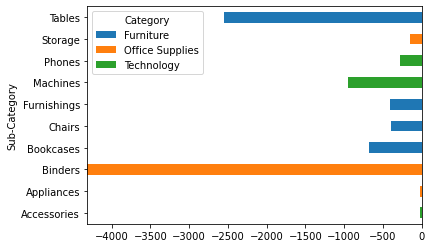

In [89]:
neg_profit_data.groupby(['Sub-Category','Category'])['Profit_y'].sum().unstack().plot(kind='barh',stacked=True)

In [90]:
returned_data = data[['Order Date','Ship Date','Order ID','Category','Sub-Category','Profit']].copy()
returned_data

,Order Date,Ship Date,Order ID,Category,Sub-Category,Profit
0,2016-11-08,2016-11-11,CA-2016-152156,Furniture,Bookcases,41.9136
1,2016-11-08,2016-11-11,CA-2016-152156,Furniture,Chairs,219.5820
2,2016-06-12,2016-06-16,CA-2016-138688,Office Supplies,Labels,6.8714
3,2015-10-11,2015-10-18,US-2015-108966,Furniture,Tables,-383.0310
4,2015-10-11,2015-10-18,US-2015-108966,Office Supplies,Storage,2.5164
...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,CA-2014-110422,Furniture,Furnishings,4.1028
9990,2017-02-26,2017-03-03,CA-2017-121258,Furniture,Furnishings,15.6332
9991,2017-02-26,2017-03-03,CA-2017-121258,Technology,Phones,19.3932
9992,2017-02-26,2017-03-03,CA-2017-121258,Office Supplies,Paper,13.3200


In [91]:
Returned = []
for i in returned_data['Profit']:
    if i < 0:
        Returned.append('Yes')
    else:
        Returned.append('No') 

In [92]:
returned_data['Returned'] = Returned
returned_data

,Order Date,Ship Date,Order ID,Category,Sub-Category,Profit,Returned
0,2016-11-08,2016-11-11,CA-2016-152156,Furniture,Bookcases,41.9136,No
1,2016-11-08,2016-11-11,CA-2016-152156,Furniture,Chairs,219.5820,No
2,2016-06-12,2016-06-16,CA-2016-138688,Office Supplies,Labels,6.8714,No
3,2015-10-11,2015-10-18,US-2015-108966,Furniture,Tables,-383.0310,Yes
4,2015-10-11,2015-10-18,US-2015-108966,Office Supplies,Storage,2.5164,No
...,...,...,...,...,...,...,...
9989,2014-01-21,2014-01-23,CA-2014-110422,Furniture,Furnishings,4.1028,No
9990,2017-02-26,2017-03-03,CA-2017-121258,Furniture,Furnishings,15.6332,No
9991,2017-02-26,2017-03-03,CA-2017-121258,Technology,Phones,19.3932,No
9992,2017-02-26,2017-03-03,CA-2017-121258,Office Supplies,Paper,13.3200,No


In [93]:
returned_data = returned_data.loc[returned_data['Returned']=='Yes']
returned_data

,Order Date,Ship Date,Order ID,Category,Sub-Category,Profit,Returned
3,2015-10-11,2015-10-18,US-2015-108966,Furniture,Tables,-383.0310,Yes
14,2015-11-22,2015-11-26,US-2015-118983,Office Supplies,Appliances,-123.8580,Yes
15,2015-11-22,2015-11-26,US-2015-118983,Office Supplies,Binders,-3.8160,Yes
23,2017-07-16,2017-07-18,US-2017-156909,Furniture,Chairs,-1.0196,Yes
27,2015-09-17,2015-09-21,US-2015-150630,Furniture,Bookcases,-1665.0522,Yes
...,...,...,...,...,...,...,...
9920,2016-03-15,2016-03-19,CA-2016-149272,Office Supplies,Binders,-35.8176,Yes
9921,2014-11-24,2014-11-30,CA-2014-111360,Office Supplies,Binders,-4.5936,Yes
9931,2015-11-13,2015-11-17,CA-2015-104948,Furniture,Bookcases,-40.1960,Yes
9937,2016-06-03,2016-06-06,CA-2016-164889,Furniture,Tables,-1.7772,Yes


I can see that most of products which have negative profit are big product. I mean, something big in size and not for something tiny such as accesories. I assume that it may caused by products quality when they are in the warehouse or the problem is on shipment handling.